[Source](https://www.youtube.com/watch?v=zadvMgHaTfA)

## Convolutional Neural Network

[CIFAR Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

### Import Necessary Libraries

In [1]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os

2023-02-15 23:41:44.076607: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

### Load Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

### Reshape

In [6]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
len(y_classes)

10

### Observe Dataset

In [9]:
def show_image(x, y, index):
	plt.figure(figsize = (15, 2))
	plt.imshow(x[index])
	plt.xlabel(y_classes[y[index]])

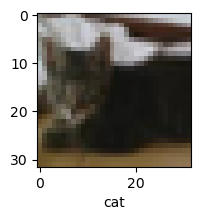

In [10]:
show_image(X_train, y_train, 9)

### Normalize Dataset

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Build Model

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 34, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

2023-02-15 23:42:15.415144: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jessica/OpenFOAM/jessica-v2212/platforms/linux64GccDPInt32Opt/lib:/usr/lib/openfoam/openfoam2212/site/2212/platforms/linux64GccDPInt32Opt/lib:/usr/lib/openfoam/openfoam2212/platforms/linux64GccDPInt32Opt/lib/sys-openmpi:/usr/lib/openfoam/openfoam2212/platforms/linux64GccDPInt32Opt/lib:/usr/lib/x86_64-linux-gnu/openmpi/lib:/usr/lib/openfoam/openfoam2212/platforms/linux64GccDPInt32Opt/lib/dummy
2023-02-15 23:42:15.415213: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-15 23:42:15.415265: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jessica-Precision-5530): /proc/driver/nvidia/version does not exist
2023-02-15 23:42:15.41

### Compile Model

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train Model

In [16]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

2023-02-15 23:42:21.841836: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2023-02-15 23:42:23.249524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
1563/1563 [==============================] - 71s 44ms/step - loss: 1.8257 - accuracy: 0.3220 - val_loss: 1.3045 - val_accuracy: 0.5286
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2423 - accuracy: 0.5593 - val_loss: 1.0760 - val_accuracy: 0.6211
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0485 - accuracy: 0.6299 - val_loss: 0.9878 - val_accuracy: 0.6557
Epoch 4/5
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9460 - accuracy: 0.6692 - val_loss: 1.0432 - val_accuracy: 0.6328
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8769 - accuracy: 0.6941 - val_loss: 1.0082 - val_accuracy: 0.6536


### Make Predictions

In [17]:
y_predictions = model.predict(X_test)
y_predictions[9]

array([5.0353222e-03, 9.2465055e-01, 4.6966691e-04, 1.5906784e-03,
       1.7148200e-03, 3.5870343e-04, 1.1499930e-03, 1.2985104e-03,
       1.5734341e-03, 6.2158458e-02], dtype=float32)

In [18]:
y_predictions = [np.argmax(arr) for arr in y_predictions]
y_predictions

[3,
 1,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 2,
 4,
 2,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 8,
 9,
 5,
 5,
 7,
 2,
 7,
 2,
 6,
 3,
 8,
 8,
 7,
 5,
 5,
 3,
 7,
 5,
 3,
 3,
 6,
 6,
 1,
 2,
 5,
 7,
 4,
 5,
 8,
 8,
 9,
 2,
 7,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 4,
 9,
 9,
 0,
 5,
 8,
 6,
 4,
 6,
 6,
 2,
 0,
 7,
 4,
 7,
 6,
 3,
 1,
 1,
 3,
 6,
 5,
 5,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 5,
 8,
 5,
 1,
 2,
 1,
 2,
 0,
 5,
 3,
 3,
 4,
 1,
 9,
 9,
 1,
 2,
 9,
 7,
 5,
 8,
 4,
 5,
 3,
 5,
 8,
 7,
 3,
 6,
 5,
 5,
 8,
 9,
 4,
 0,
 2,
 5,
 3,
 9,
 3,
 4,
 0,
 1,
 5,
 6,
 2,
 7,
 8,
 4,
 7,
 4,
 9,
 6,
 9,
 4,
 9,
 9,
 3,
 7,
 5,
 1,
 0,
 7,
 2,
 3,
 5,
 8,
 6,
 3,
 3,
 8,
 5,
 3,
 3,
 1,
 7,
 4,
 8,
 8,
 7,
 3,
 3,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 1,
 5,
 7,
 3,
 3,
 4,
 9,
 8,
 4,
 7,
 3,
 9,
 5,
 3,
 9,
 3,
 2,
 3,
 6,
 3,
 1,
 5,
 1,
 8,
 0,
 4,
 7,
 5,
 5,
 1,
 1,
 1,
 9,
 0,
 6,
 1,
 8,
 2,
 4,


In [19]:
y_test = y_test.reshape(-1, )

In [20]:
y_predictions[11]

9

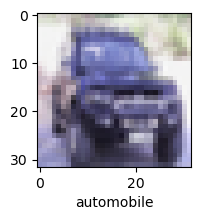

In [21]:
show_image(X_test, y_test, 9)

### Evaluate Model

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0082 - accuracy: 0.6536


[1.0081579685211182, 0.6535999774932861]

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1000
           1       0.80      0.79      0.79      1000
           2       0.66      0.45      0.53      1000
           3       0.41      0.52      0.46      1000
           4       0.55      0.67      0.60      1000
           5       0.47      0.69      0.56      1000
           6       0.83      0.65      0.73      1000
           7       0.72      0.73      0.73      1000
           8       0.89      0.67      0.76      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.66     10000
weighted avg       0.68      0.65      0.66     10000



In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictions)
cm

array([[615,  25,  69,  72,  41,  21,   8,  32,  52,  65],
       [ 12, 787,   3,  26,   5,  21,   4,  13,   8, 121],
       [ 39,   5, 445, 126, 159, 127,  44,  44,   4,   7],
       [  6,   6,  24, 517,  85, 283,  36,  26,   3,  14],
       [ 11,   2,  36,  83, 673,  83,  25,  80,   5,   2],
       [  4,   2,  21, 171,  57, 686,   4,  46,   3,   6],
       [  0,   7,  36, 128,  88,  78, 649,   7,   2,   5],
       [  6,   1,  13,  62,  78, 101,   3, 731,   1,   4],
       [ 71,  62,  20,  48,  30,  31,   4,   7, 665,  62],
       [ 19,  89,   7,  39,  11,  21,   8,  30,   8, 768]])

In [25]:
import seaborn as sns

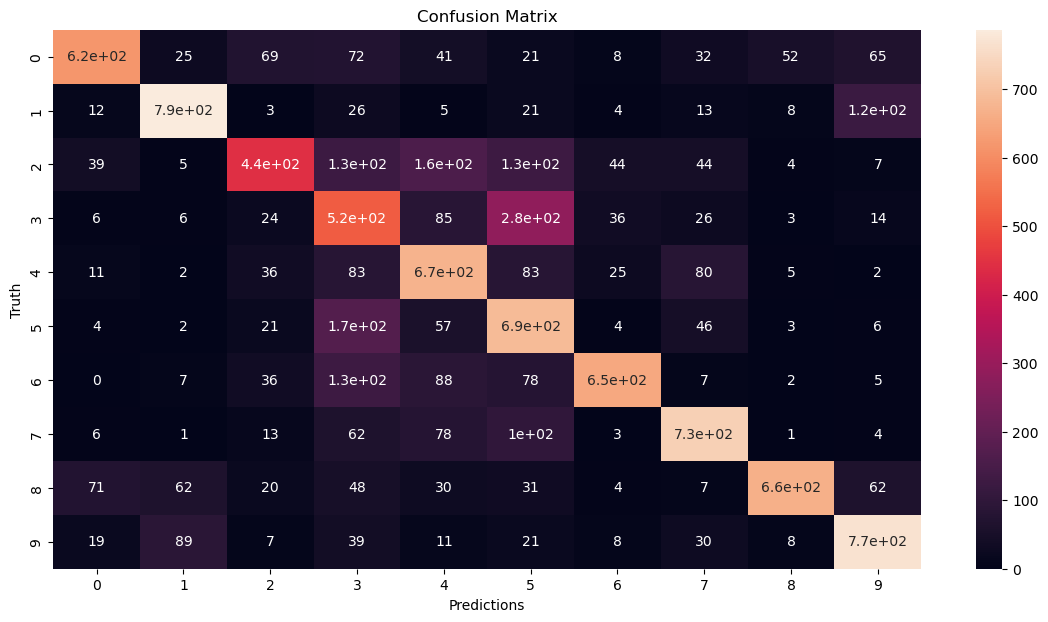

In [26]:
plt.figure(figsize = (14, 7))
sns.heatmap(cm, annot = True)
plt.ylabel('Truth')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()